In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import sys
from pathlib import Path
# Add the parent directory to the sys.path (without this we cannot import constants or scripts)
sys.path.insert(0, str(Path.cwd().parent))
from constants.countries import highincome_countries
from scripts.plotting import plot_value_per_year_GER_HIC_GLO

In [9]:
DATA_PATH = "../data/final/"
OUTPUT_PATH = "output/" # if you want to save the plots
alcohol_data_path = DATA_PATH + "wdi_AlcoholConsumption.csv"
VALUE_COLUMN_NAME = "Value"
YEAR_COLUMN_NAME = "Year"

In [10]:
alco_tobacco_df = pd.read_csv(alcohol_data_path)
alco_tobacco_df

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,Total alcohol consumption per capita (liters o...,2000,0.00277
1,Albania,ALB,Total alcohol consumption per capita (liters o...,2000,4.43100
2,Algeria,DZA,Total alcohol consumption per capita (liters o...,2000,0.30323
3,Andorra,AND,Total alcohol consumption per capita (liters o...,2000,12.54881
4,Angola,AGO,Total alcohol consumption per capita (liters o...,2000,5.18632
...,...,...,...,...,...
926,"Venezuela, RB",VEN,Total alcohol consumption per capita (liters o...,2019,3.01625
927,Viet Nam,VNM,Total alcohol consumption per capita (liters o...,2019,9.33984
928,"Yemen, Rep.",YEM,Total alcohol consumption per capita (liters o...,2019,0.02778
929,Zambia,ZMB,Total alcohol consumption per capita (liters o...,2019,3.85176


In [11]:
# Calculating the average for each year across all countries
average_per_year = alco_tobacco_df.groupby('Year')[VALUE_COLUMN_NAME].mean().reset_index()

# Adding 'Entity' and 'Code' columns to the averaged data
average_per_year['Country Name'] = 'Global'
average_per_year['Country Code'] = 'GLO'
average_per_year['Series Name'] = "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"

# Appending the average data to the original DataFrame
alcohol_df_wrl = pd.concat([alco_tobacco_df, average_per_year], ignore_index=True)

# Display the last few rows to verify the appended averages
alcohol_df_wrl

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,Total alcohol consumption per capita (liters o...,2000,0.002770
1,Albania,ALB,Total alcohol consumption per capita (liters o...,2000,4.431000
2,Algeria,DZA,Total alcohol consumption per capita (liters o...,2000,0.303230
3,Andorra,AND,Total alcohol consumption per capita (liters o...,2000,12.548810
4,Angola,AGO,Total alcohol consumption per capita (liters o...,2000,5.186320
...,...,...,...,...,...
931,Global,GLO,Total alcohol consumption per capita (liters o...,2000,5.424797
932,Global,GLO,Total alcohol consumption per capita (liters o...,2005,5.533195
933,Global,GLO,Total alcohol consumption per capita (liters o...,2010,5.558328
934,Global,GLO,Total alcohol consumption per capita (liters o...,2015,5.488749


In [12]:
# Filter the DataFrame for high-income countries
highincome_df = alcohol_df_wrl[alcohol_df_wrl['Country Name'].isin(highincome_countries)]

# Calculate the average for each year for high-income countries
average_per_year = highincome_df.groupby('Year')[VALUE_COLUMN_NAME].mean().reset_index()

# Adding 'Entity' and 'Code' columns for the average data
average_per_year['Country Name'] = 'High-income'
average_per_year['Country Code'] = 'HIC'
average_per_year['Series Name'] = "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"

smoking_df = pd.concat([alcohol_df_wrl, average_per_year], ignore_index=True)

# Display the calculated averages
smoking_df

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,Total alcohol consumption per capita (liters o...,2000,0.002770
1,Albania,ALB,Total alcohol consumption per capita (liters o...,2000,4.431000
2,Algeria,DZA,Total alcohol consumption per capita (liters o...,2000,0.303230
3,Andorra,AND,Total alcohol consumption per capita (liters o...,2000,12.548810
4,Angola,AGO,Total alcohol consumption per capita (liters o...,2000,5.186320
...,...,...,...,...,...
936,High-income,HIC,Total alcohol consumption per capita (liters o...,2000,9.480070
937,High-income,HIC,Total alcohol consumption per capita (liters o...,2005,9.389837
938,High-income,HIC,Total alcohol consumption per capita (liters o...,2010,9.042423
939,High-income,HIC,Total alcohol consumption per capita (liters o...,2015,8.766916


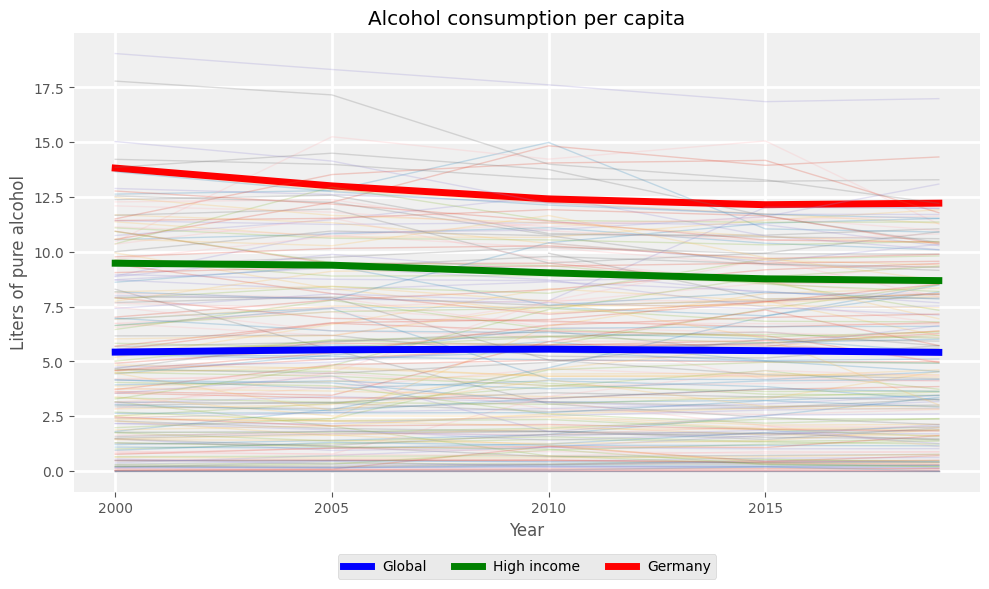

In [13]:
plot_value_per_year_GER_HIC_GLO(
    smoking_df, 
    xticks = 5, 
    output_fig_path = OUTPUT_PATH + "AlcoholConsumptionPerCapita.pdf",
    xlabel = 'Year',
    ylabel = "Liters of pure alcohol",
    title = "Alcohol consumption per capita")